
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Nakajo Storms: Selection of representative cases using Maximum Dissimilarity (MaxDiss) algorithm (Camus et al. 2011)

inputs required: 
  * Synthetic TC parameters that affect the site (output of *notebook 05*)
  * number of representative cases to be selected using MaxDiss

in this notebook:
  * Analysis of historical and synthetic events
  * MDA selection of representative number of events

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np
import pandas as pd

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.storms import Extract_Circle
from teslakit.mda import MaxDiss_Simplified_NoThreshold

from teslakit.plotting.storms import Plot_TCs_Params_MDAvsSIM, \
Plot_TCs_Params_HISTvsSIM, Plot_TCs_Params_HISTvsSIM_histogram



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('KWAJALEIN_emulator')


In [3]:
# --------------------------------------
# load data and set parameters

# wave point longitude and latitude
pnt_lon = 167.73
pnt_lat = 8.72

# radius for TCs selection (º)
r1 = 14
r2 = 4

# MDA number of cases
num_sel_mda = 500

# Load Nakajo simulations
TCs_Nakajo = db.Load_TCs_Nakajo()


In [6]:
# Get Nakajo TCs at the study area

# dictionary with needed variable names
d_vns = {
    'longitude':'ylon_TC',
    'latitude':'ylat_TC',
    'time': 'yts',
    'pressure':'yCPRES',
}

# Extract Nakajo TCs inside r2
#_, TCs_r2_sim_params = Extract_Circle(TCs_Nakajo, pnt_lon, pnt_lat, r2, d_vns)
#print(TCs_r2_sim_params)


# --------------------------------------

# USE Sara dataset (Nakajo + filters)
TCs_r2_sim_params = db.Load_TCs_r2_sim_params()
print(TCs_r2_sim_params)


<xarray.Dataset>
Dimensions:        (storm: 10159)
Coordinates:
  * storm          (storm) int64 296 299 611 612 ... 999833 999845 999877 999986
Data variables:
    pressure_min   (storm) float64 ...
    pressure_mean  (storm) float64 ...
    velocity_mean  (storm) float64 ...
    gamma          (storm) float64 ...
    delta          (storm) float64 ...
    category       (storm) int64 ...
    dmin_date      (storm) float64 ...
    last_date      (storm) float64 ...
    index_in       (storm) int64 ...
    index_out      (storm) int64 ...
Attributes:
    point_lon:  167.73
    point_lat:  8.72
    point_r:    4


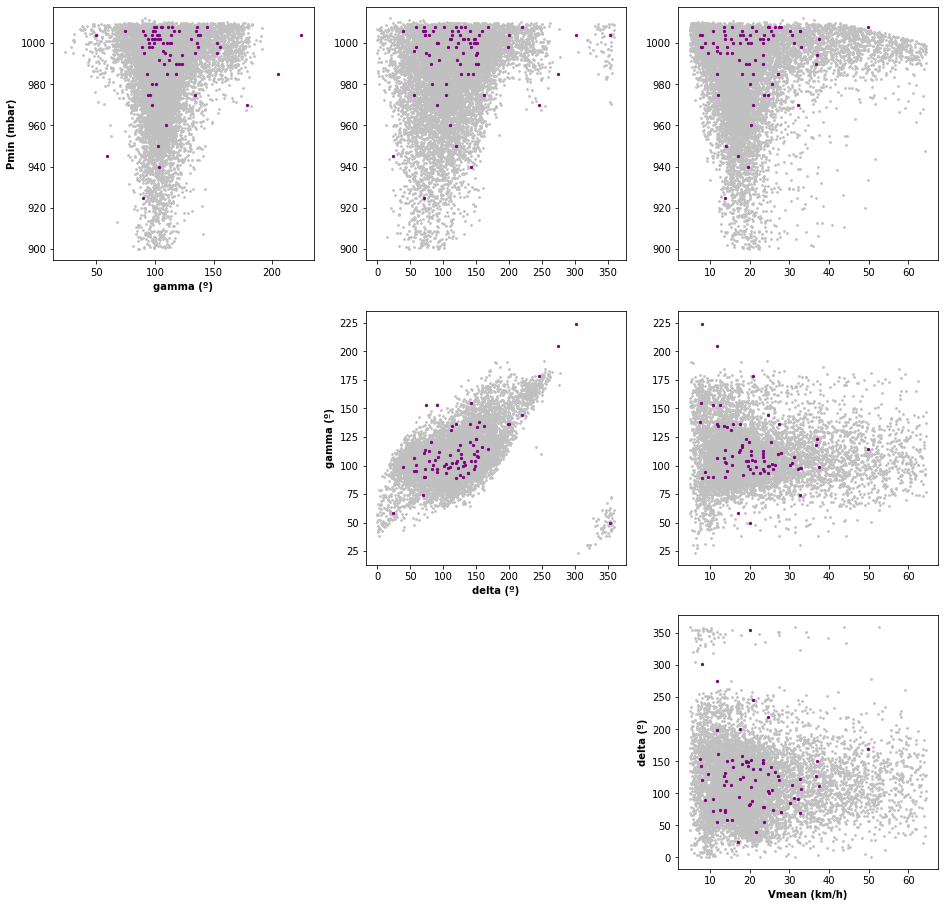

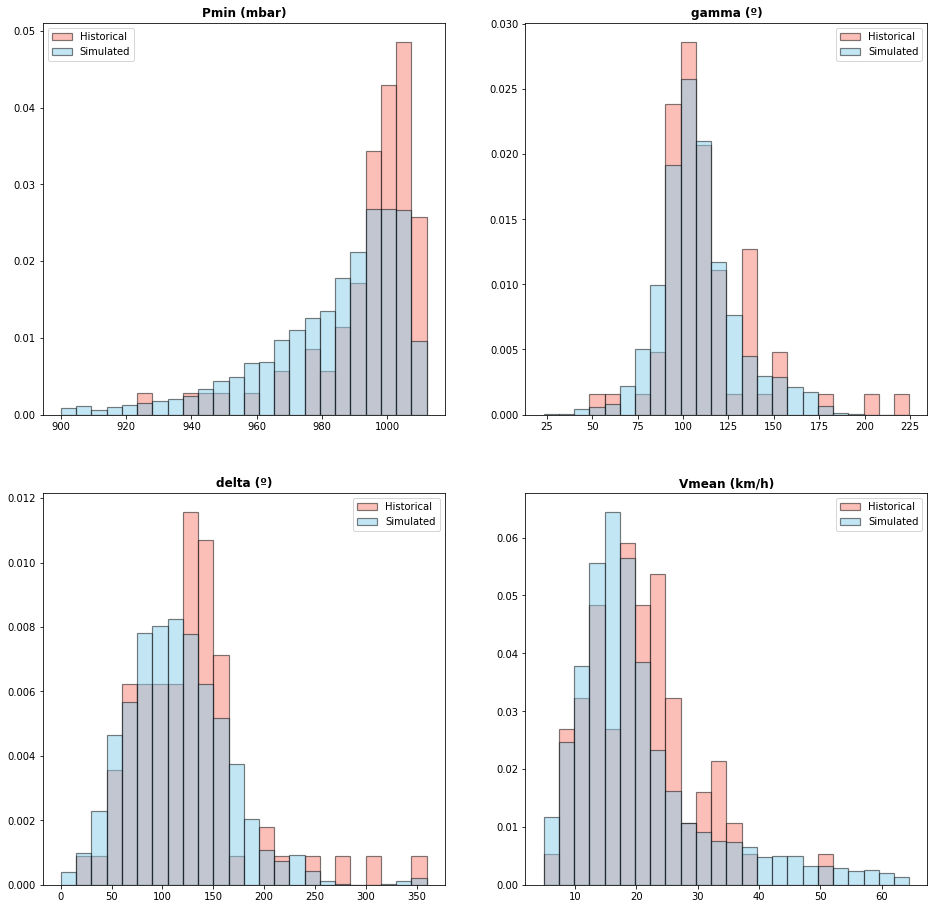

In [7]:
# Historical vs Nakajo Simulation parameters: 
_, TCs_r2_hist_params = db.Load_TCs_r2_hist()  # historical TCs parameters inside radius 2

# historical TCs parameters inside radius 2 (filtrados Sara)
#TCs_r2_hist_params = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/TCs/TCs_r2_hist_params_filtered.nc')

# scatter plot
Plot_TCs_Params_HISTvsSIM(TCs_r2_hist_params, TCs_r2_sim_params);

# histogram
Plot_TCs_Params_HISTvsSIM_histogram(TCs_r2_hist_params, TCs_r2_sim_params);



## Simulated TCs - MaxDiss classification

In [9]:
# --------------------------------------
# MaxDiss classification

# get simulated parameters  
#pmean_s = TCs_r2_sim_params.pressure_mean.values[:]
#pmin_s  = TCs_r2_sim_params.pressure_min.values[:]
#gamma_s = TCs_r2_sim_params.gamma.values[:]
#delta_s = TCs_r2_sim_params.delta.values[:]
#vmean_s = TCs_r2_sim_params.velocity_mean.values[:]

# subset, scalar and directional indexes
#data_mda = np.column_stack((pmean_s, pmin_s, vmean_s, delta_s, gamma_s))
#ix_scalar = [0,1,2]
#ix_directional = [3,4]

# MDA
#centroids = MaxDiss_Simplified_NoThreshold(
#    data_mda, num_sel_mda, ix_scalar, ix_directional 
#)


# store MDA storms - parameters 
#TCs_r2_MDA_params = xr.Dataset(
#    {
#        'pressure_mean':(('storm'), centroids[:,0]),
#        'pressure_min':(('storm'), centroids[:,1]),
#        'velocity_mean':(('storm'), centroids[:,2]),
#        'delta':(('storm'), centroids[:,3]),
#        'gamma':(('storm'), centroids[:,4]),
#    },
#    coords = {
#        'storm':(('storm'), np.arange(num_sel_mda))    
#    },
#)
#print(TCs_r2_MDA_params)



# --------------------------------------
# USE Sara subset (MDA)

dm = pd.read_pickle('/Users/albacid/Projects/SERDP/inputs_Kwajalein/TCs/MDA500/subset_kwa_mda_500_Pmin.pkl')

# store MDA storms - parameters 
TCs_r2_MDA_params = xr.Dataset(
    {
        'pressure_mean':(('storm'), np.nan*np.ones(len(dm))),
        'pressure_min':(('storm'), dm['pmin']),
        'velocity_mean':(('storm'), dm['vmean']),
        'delta':(('storm'), dm['delta']),
        'gamma':(('storm'), dm['gamma']),
    },
    coords = {
        'storm':(('storm'), np.arange(len(dm)))    
    },
)
print(TCs_r2_MDA_params)

# save
db.Save_TCs_r2_mda_params(TCs_r2_MDA_params)

<xarray.Dataset>
Dimensions:        (storm: 500)
Coordinates:
  * storm          (storm) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
Data variables:
    pressure_mean  (storm) float64 nan nan nan nan nan ... nan nan nan nan nan
    pressure_min   (storm) float64 1.012e+03 995.5 907.1 ... 993.2 954.1 999.1
    velocity_mean  (storm) float64 33.32 62.49 16.58 5.113 ... 6.322 19.57 16.97
    delta          (storm) float64 19.01 196.5 131.4 234.0 ... 113.7 152.0 215.9
    gamma          (storm) float64 91.12 173.8 141.4 156.8 ... 103.1 88.51 148.2


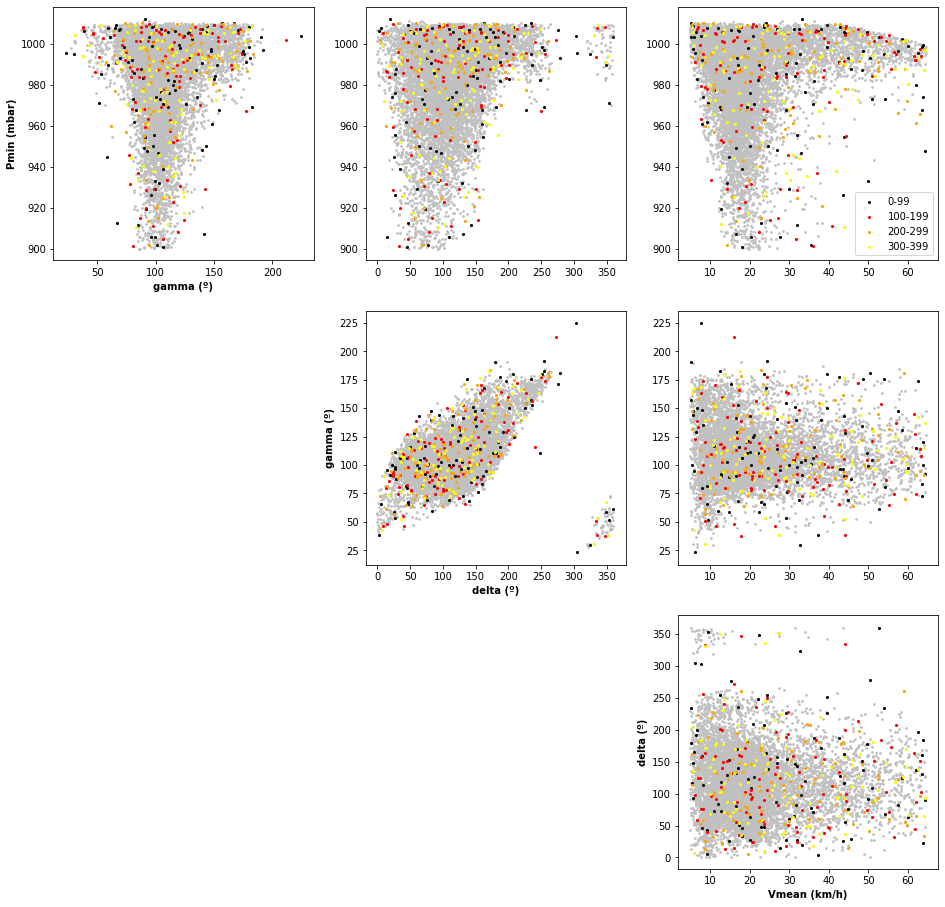

In [10]:
# Historical vs Simulated: scatter plot parameters
Plot_TCs_Params_MDAvsSIM(TCs_r2_MDA_params, TCs_r2_sim_params);


## Nakajo TCs (MDA centroids) Waves Simulation

Waves data is generated by numerically simulating selected storms. 

This methodology is not included inside teslakit python library.

This step needs to be done before continuing with notebook 07
